In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Открываем тренировачный и тестовые датасеты

In [28]:
data = pd.read_csv("train_df.csv")

data.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0


In [3]:
test = pd.read_csv("test_df.csv")

test.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 81 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   search_id   6560 non-null   int64  
 1   feature_0   6560 non-null   int64  
 2   feature_1   6560 non-null   int64  
 3   feature_2   6560 non-null   int64  
 4   feature_3   6560 non-null   int64  
 5   feature_4   6560 non-null   int64  
 6   feature_5   6560 non-null   int64  
 7   feature_6   6560 non-null   int64  
 8   feature_7   6560 non-null   int64  
 9   feature_8   6560 non-null   int64  
 10  feature_9   6560 non-null   int64  
 11  feature_10  6560 non-null   int64  
 12  feature_11  6560 non-null   int64  
 13  feature_12  6560 non-null   int64  
 14  feature_13  6560 non-null   int64  
 15  feature_14  6560 non-null   int64  
 16  feature_15  6560 non-null   int64  
 17  feature_16  6560 non-null   float64
 18  feature_17  6560 non-null   float64
 19  feature_18  6560 non-null  

In [5]:
data.describe()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
count,6560.000000,6560.0,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,...,6559.000000,6559.000000,6559.000000,6559.0,6559.0,6559.0,6559.000000,6559.000000,6559.000000,6559.000000
mean,213788.418750,9.0,0.210823,0.457317,0.586280,15.449085,3.871189,33.733537,1.288720,1.843293,...,0.202641,0.438765,0.099540,0.0,0.0,0.0,0.301842,0.025419,0.027245,0.024851
std,141928.079162,0.0,0.669442,1.178403,0.492537,5.417907,0.467931,10.734557,2.270178,1.926018,...,0.086611,0.245206,0.062415,0.0,0.0,0.0,0.311427,0.103113,0.110642,0.155684
min,116.000000,9.0,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,92213.000000,9.0,0.000000,0.000000,0.000000,9.000000,4.000000,26.000000,0.000000,0.000000,...,0.172545,0.273321,0.056253,0.0,0.0,0.0,0.036740,0.000000,0.000000,0.000000
50%,187703.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,34.000000,0.000000,2.000000,...,0.215056,0.446707,0.095911,0.0,0.0,0.0,0.176140,0.000000,0.000000,0.000000
75%,330552.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,43.000000,2.000000,3.000000,...,0.255623,0.612115,0.139113,0.0,0.0,0.0,0.532990,0.000000,0.000000,0.000000
max,496975.000000,9.0,3.000000,6.000000,1.000000,20.000000,4.000000,49.000000,7.000000,7.000000,...,0.485510,0.998872,0.411563,0.0,0.0,0.0,1.000020,0.799808,0.908132,1.000000


распределение таргета

<Axes: >

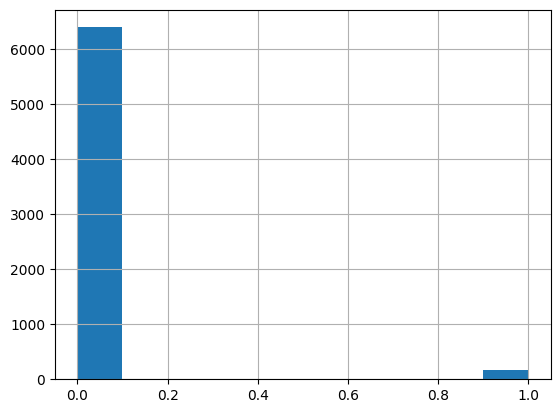

In [6]:
data['target'].hist()

In [7]:
data[data['target'] == 1]

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
59,2545,9,0,0,1,20,4,41,0,0,...,0.244768,0.162940,0.039882,0.0,0.0,0.0,0.03674,0.0,0.0,1.0
64,2863,9,0,0,1,20,4,49,0,5,...,0.368324,0.584318,0.215218,0.0,0.0,0.0,0.98071,0.0,0.0,1.0
190,24317,9,0,0,0,9,4,40,4,4,...,0.177117,0.378161,0.066979,0.0,0.0,0.0,0.07308,0.0,0.0,1.0
201,24317,9,0,0,0,9,4,40,4,4,...,0.162986,0.549790,0.089608,0.0,0.0,0.0,0.14540,0.0,0.0,1.0
381,58362,9,0,4,0,9,4,26,3,5,...,0.183460,0.435136,0.079830,0.0,0.0,0.0,0.00000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,187703,9,0,0,0,9,4,46,0,0,...,0.264954,0.127265,0.033719,0.0,0.0,0.0,0.00000,0.0,0.0,1.0
6511,187703,9,0,0,0,9,4,46,0,0,...,0.260698,0.143888,0.037511,0.0,0.0,0.0,0.00000,0.0,0.0,1.0
6512,187703,9,0,0,0,9,4,46,0,0,...,0.247334,0.118423,0.029290,0.0,0.0,0.0,0.00000,0.0,0.0,1.0
6513,187703,9,0,0,0,9,4,46,0,0,...,0.184104,0.097154,0.017886,0.0,0.0,0.0,0.00000,0.0,0.0,1.0


In [11]:
f"количество уникальных айди поиска - {len(data['search_id'].unique())}"

'количество уникальных айди поиска - 445'

In [12]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.6 MB/s eta 0:00:00


# Обучение Ranker-модели
в качестве модели, я решил взять catboostranker для ранжирования

## готовим данные для обучения

сначала надо отсортировать по айди поиску

In [29]:
data = data.sort_values(by="search_id")

In [30]:
X, y = data.drop(['target'], axis=1), data['target']

train_X, test_X, train_y, test_y = X[:10000], X[10000:], y[:10000], y[10000:]

In [31]:
max_relevance = np.max(train_y)
train_y /= max_relevance
test_y /= max_relevance

In [32]:
queries_train = train_X['search_id'].values
queries_test = test_X['search_id'].values
num_queries = np.unique(queries_train).shape[0]
num_queries

659

In [33]:
train_X = train_X.drop(['search_id'], axis=1)
test_X = test_X.drop(['search_id'], axis=1)

In [34]:
from catboost import CatBoostRanker, Pool

train = Pool(
    data=train_X,
    label=train_y,
    group_id=queries_train
)

test = Pool(
    data=test_X,
    label=test_y,
    group_id=queries_test
)

## функция обучения модели

In [36]:
from copy import deepcopy

default_parameters = {
    'iterations': 2000,
    'custom_metric': ['NDCG'],
    'verbose': False,
    'random_seed': 0,
}

def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function

    if additional_params is not None:
        parameters.update(additional_params)

    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)

    return model

In [37]:
model = fit_model('RMSE') # в качестве loss я взял RMSE

/usr/local/lib/python3.10/dist-packages/catboost/core.py:6325: RuntimeWarning: Regression loss ('RMSE') ignores an important ranking parameter 'group_id'
  warnings.warn("Regression loss ('{}') ignores an important ranking parameter 'group_id'".format(loss_function), RuntimeWarning)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Также пробовал оптимизировать веса данных, но большого прироста это не дало

In [ ]:
def create_weights(queries):
    query_set = np.unique(queries)
    query_weights = np.random.uniform(size=query_set.shape[0])
    weights = np.zeros(shape=queries.shape)

    for i, query_id in enumerate(query_set):
        weights[queries == query_id] = query_weights[i]

    return weights


train_with_weights = Pool(
    data=train_X,
    label=train_y,
    group_weight=create_weights(queries_train),
    group_id=queries_train
)

test_with_weights = Pool(
    data=test_X,
    label=test_y,
    group_weight=create_weights(queries_test),
    group_id=queries_test
)

model = fit_model(
    'RMSE',
    additional_params={'train_dir': 'RMSE_weigths'},
    train_pool=train_with_weights,
    test_pool=test_with_weights
)

/usr/local/lib/python3.10/dist-packages/catboost/core.py:6325: RuntimeWarning: Regression loss ('RMSE') ignores an important ranking parameter 'group_id'
  warnings.warn("Regression loss ('{}') ignores an important ranking parameter 'group_id'".format(loss_function), RuntimeWarning)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Инференс модели

In [38]:
test_data = pd.read_csv("test_df.csv")

In [39]:
from sklearn.metrics import ndcg_score

preds = model.predict(test_data.drop(['search_id', 'target'], axis=1))

print(ndcg_score(np.asarray(preds).reshape(1,-1), test_data['target'].values.reshape(1,-1)))

0.9055061006614242


# test data score - 0.905

экспорт модели

In [41]:
model.save_model("vk_ranker.cbm")